In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [134]:
# dataset
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [135]:
df=df.drop(columns="Id")
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [137]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [138]:
# checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [139]:
# to see the no. of unique species
print(df["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [140]:
# to see the count of each species
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualizating using Scatterplot


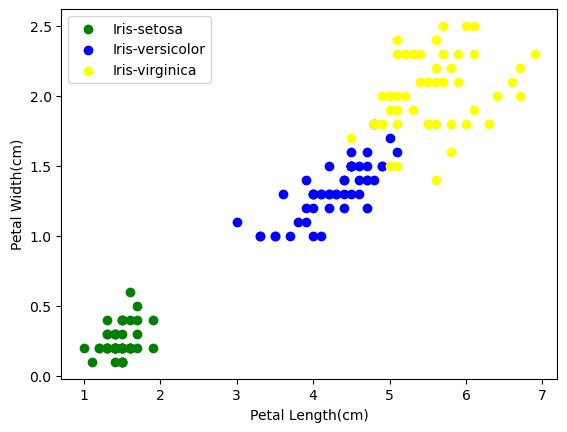

In [141]:
colors=['green','blue','yellow']
spec=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=df[df['Species']==spec[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],label=spec[i],c=colors[i])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend()


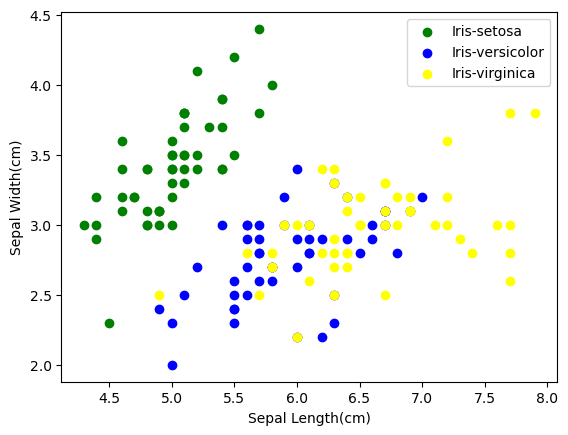

In [142]:
for i in range(3):
    x=df[df['Species']==spec[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],label=spec[i],c=colors[i])
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.legend()

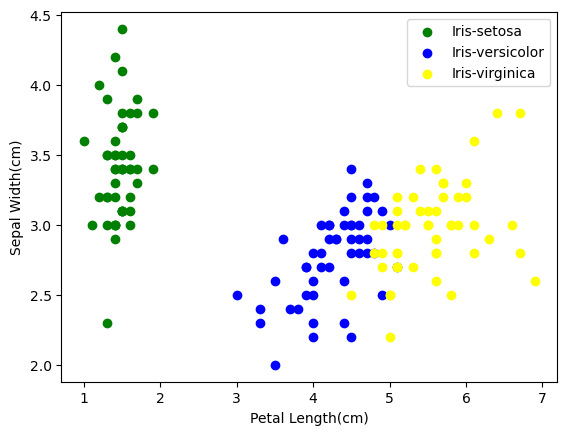

In [143]:
for i in range(3):
    x=df[df['Species']==spec[i]]
    plt.scatter(x["PetalLengthCm"],x["SepalWidthCm"],label=spec[i],c=colors[i])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.legend()

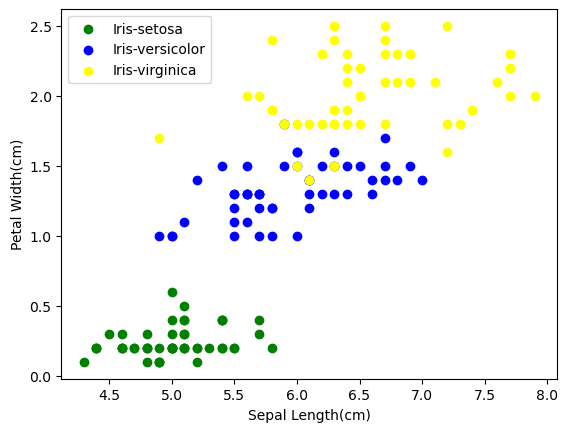

In [144]:
for i in range(3):
    x=df[df['Species']==spec[i]]
    plt.scatter(x["SepalLengthCm"],x["PetalWidthCm"],label=spec[i],c=colors[i])
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend()

# Model Training

# Spliting the data into training and testing set

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y=df[["Species"]].values
# train = 80
# test = 20
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Logistic Regression

In [201]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [202]:
# accuracy 
model.score(x_test,y_test)

0.9666666666666667

**Approximately 97% accuracy**

# KNN Classification

In [209]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [210]:
model.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [212]:
# accuracy
model.score(x_test,y_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9666666666666667

**Approximately 97% accuracy**

# Prediction using metrics

In [203]:
actual = y
predicted = model.predict(x)

In [204]:
from sklearn import metrics
print(metrics.classification_report(actual,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.94      0.95        50
 Iris-virginica       0.94      0.96      0.95        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [205]:
print(metrics.confusion_matrix(actual,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [207]:
predicted = model.predict([[5.1,3.5,1.4,0.2]])
predicted

array(['Iris-setosa'], dtype=object)